# Video lesson \#9 notebook

## Part 1: Pandas `Series` and `DataFrame` objects

In [ ]:
# Import Pandas (and NumPy, because Pandas is built on NumPy)
import numpy as np
import pandas as pd

In [ ]:
# Create two new Pandas Series objects
s1 = pd.Series(index=[2016,2017,2018,2019,2020],
               data=[4.1,5.2,6.3,7.4,8.5],
               name='Temperature')
s2 = pd.Series(index=[2016,2017,2018,2019,2020],
               data=[35.5,35.0,34.5,34.0,33.5],
               name='Salinity')

# Series still have a length, as with lists and NumPy arrays
print(len(s1))

5


In [ ]:
# Extract parts of the Series object
print(s1.index)         # get index as Index object (not very useful)
print(s1.index.values)  # get index converted into NumPy array
print(s1.values)        # get data converted into NumPy array

Int64Index([2016, 2017, 2018, 2019, 2020], dtype='int64')
[2016 2017 2018 2019 2020]
[4.1 5.2 6.3 7.4 8.5]


In [ ]:
# Select data from Series object using .iloc (Python/NumPy-style selection by position)
print('\nOption 1:\n', s1.iloc[3])                             # use a single integer index (returns the value)
print('\nOption 2:\n', s1.iloc[[2,3,4]])                       # use a list or array of integer indices (returns a Series)
print('\nOption 3:\n', s1.iloc[2:5])                           # use a slice of integer indices (returns a Series)
print('\nOption 4:\n', s1.iloc[[False,False,True,True,True]])  # use a Boolean array (returns a Series)

# Select data from Series object using .loc (selection by label)
print('\nOption 5:\n', s1.loc[2019])              # use a single label of the index (NOT an integer position along the index)
print('\nOption 6:\n', s1.loc[[2018,2019,2020]])  # use a list or array of labels
print('\nOption 7:\n', s1.loc[2018:2020])         # use a slice of labels (UNLIKE standard Python/NumPy slices, the end value is inclusive)

# Remember that you have to use .values to convert a Series to a NumPy array:
print('\nReminder:\n', s1.loc[2018:2020].values)


Option 1:
 7.4

Option 2:
 2018    6.3
2019    7.4
2020    8.5
Name: Temperature, dtype: float64

Option 3:
 2018    6.3
2019    7.4
2020    8.5
Name: Temperature, dtype: float64

Option 4:
 2018    6.3
2019    7.4
2020    8.5
Name: Temperature, dtype: float64

Option 5:
 7.4

Option 6:
 2018    6.3
2019    7.4
2020    8.5
Name: Temperature, dtype: float64

Option 7:
 2018    6.3
2019    7.4
2020    8.5
Name: Temperature, dtype: float64

Reminder:
 [6.3 7.4 8.5]


In [ ]:
# Changing values of a Series using the indexing options above
s1.loc[2018] = 5.3
print(s1)
s1.iloc[3:5] = [6.4,7.5]
print(s1)
s1.loc[2018:2020] += 1
print(s1)

2016    4.1
2017    5.2
2018    5.3
2019    7.4
2020    8.5
Name: Temperature, dtype: float64
2016    4.1
2017    5.2
2018    5.3
2019    6.4
2020    7.5
Name: Temperature, dtype: float64
2016    4.1
2017    5.2
2018    6.3
2019    7.4
2020    8.5
Name: Temperature, dtype: float64


In [ ]:
# Add a new value to a Series using a new index label
s1.loc[2021] = 9.6
print(s1)

2016    4.1
2017    5.2
2018    6.3
2019    7.4
2020    8.5
2021    9.6
Name: Temperature, dtype: float64


In [ ]:
# Two ways of creating a Pandas DataFrame object

# Option 1: join two or more Series objects
df = pd.concat([s1,s2],axis=1)

# Option 2: provide a dictionary with the data lists or NumPy arrays
df = pd.DataFrame(index=[2016,2017,2018,2019,2020],
                  data={'Temperature':[4.1,5.2,6.3,7.4,8.5],
                        'Salinity':[35.5,35.0,34.5,34.0,33.5]})

In [ ]:
# Get information about the DataFrame object
print(df.shape)    # get dimensions
print(df.size)     # get number of data values
print(df)          # print() still works, but is not as nice looking as display()
display(df)        # display() opens the display interface, a more nicely formatted view of the object
df.describe()      # get useful summary statistics

(5, 2)
10
      Temperature  Salinity
2016          4.1      35.5
2017          5.2      35.0
2018          6.3      34.5
2019          7.4      34.0
2020          8.5      33.5


,Temperature,Salinity
2016,4.1,35.5
2017,5.2,35.0
2018,6.3,34.5
2019,7.4,34.0
2020,8.5,33.5


,Temperature,Salinity
count,5.000000,5.000000
mean,6.300000,34.500000
std,1.739253,0.790569
min,4.100000,33.500000
25%,5.200000,34.000000
50%,6.300000,34.500000
75%,7.400000,35.000000
max,8.500000,35.500000


In [ ]:
# Extract parts of the DataFrame object
print(df.index.values)       # get index as a NumPy array
print(df.columns.values)     # get column names as a NumPy array
print(df.values)             # get data as a NumPy array
print(df['Salinity'].values) # get one column as a NumPy array
                             #  (similar to dictionary indexing)

[2016 2017 2018 2019 2020]
['Temperature' 'Salinity']
[[ 4.1 35.5]
 [ 5.2 35. ]
 [ 6.3 34.5]
 [ 7.4 34. ]
 [ 8.5 33.5]]
[35.5 35.  34.5 34.  33.5]


In [ ]:
# Select data from Series object using .iloc or .loc
print('\nExample 1:\n', df.iloc[3])                    # use a single index (returns a Series)
print('\nExample 2:\n', df.loc[2019])                  # use a single label (returns a Series)
print('\nExample 3:\n', df.iloc[2:5])                  # use a slice of integer indices (returns a DataFrame)
print('\nExample 4:\n', df.loc[2018:2020])             # use a slice of labels (returns a DataFrame)
print('\nExample 5:\n', df['Temperature'].loc[2019])   # select a column AND choose a single row (returns the value)
print('\nExample 6:\n', df[['Temperature','Salinity']].loc[2019])  # select multiple columns AND choose a single row (returns a Series)
print('\nExample 7:\n', df[df['Temperature'] > 6.0])   # use a Boolean condition applied to one column (returns a DataFrame)

# NOTE: changing values using .iloc and .loc selection works similar to as shown above with Series


Example 1:
 Temperature     7.4
Salinity       34.0
Name: 2019, dtype: float64

Example 2:
 Temperature     7.4
Salinity       34.0
Name: 2019, dtype: float64

Example 3:
       Temperature  Salinity
2018          6.3      34.5
2019          7.4      34.0
2020          8.5      33.5

Example 4:
       Temperature  Salinity
2018          6.3      34.5
2019          7.4      34.0
2020          8.5      33.5

Example 5:
 7.4

Example 6:
 Temperature     7.4
Salinity       34.0
Name: 2019, dtype: float64

Example 7:
       Temperature  Salinity
2018          6.3      34.5
2019          7.4      34.0
2020          8.5      33.5


In [ ]:
# Apply NumPy functions to Series and DataFrame objects
print('\nExample 1:\n', df.mean())              # take the mean along the index (axis 0)
print('\nExample 2:\n', df.mean(axis=0))        # same as above
print('\nExample 3:\n', df.mean(axis=1))        # take the mean along the columns (axis 1)
print('\nExample 4:\n', df.mean(skipna=True))   # ignore NaN values (if present) when taking the mean

# Combine column extraction, selection by label, and applying a NumPy function
print('\nExample 5:\n', df['Salinity'].loc[2017:].mean())   # returns a single value


Example 1:
 Temperature     6.3
Salinity       34.5
dtype: float64

Example 2:
 Temperature     6.3
Salinity       34.5
dtype: float64

Example 3:
 2016    19.8
2017    20.1
2018    20.4
2019    20.7
2020    21.0
dtype: float64

Example 4:
 Temperature     6.3
Salinity       34.5
dtype: float64

Example 5:
 34.25


In [ ]:
# Save a Pandas DataFrame as a CSV file
# df.to_csv('filepath/including/filename.csv')

# Read a CSV file as a Pandas DataFrame (more powerful than np.genfromtxt()!)
# See available arguments: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# df = pd.read_csv('filepath/including/filename.csv',delimiter=',',delim_whitespace=False,header=0)

# Read an Excel spreadsheet as a Pandas DataFrame
# See available arguments: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
# df = pd.read_excel('filepath/including/filename.xlsx',sheet_name='Sheet1')

## Part 2: xarray `DataArray` and `Dataset` objects

In [ ]:
# Import xarray (and other libraries, because they are helpful when working with xarray files)
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [ ]:
# You'll need to install the netCDF4 library to work with netCDF files
# You should only need to run this line of code once per Colab notebook,
#   so comment it out or delete it afterwards
# !pip install netcdf4

In [ ]:
# Give Colab access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# NOTE: you'll need to change this variable to match your own filepath
filepath = 'drive/My Drive/OCEAN 215 - Autumn \'20/OCEAN 215 - Autumn \'20 - Course documents/' \
           + 'Video lesson slides and notebooks/2020-11-03 - lesson #9 data/bsose_monthly_velocities.nc'

# This is how we load a netCDF file
# (This method is safe on Colab for files
#  up to about 0.5 GB [500 MB] in size)
data = xr.open_dataset(filepath)

In [ ]:
# Examine structure of xarray Dataset using the interactive display() interface
display(data)    # Note there are 2 variables (eastward velocities, northward velocities)
                 #   4 dimensions, and 4 coordinates (time, lat, lon, depth), so each variable is a 4D array

# Note that you can click the buttons to view attributes (page icon) and actual data values (cylinder icon)

<xarray.Dataset>
Dimensions:  (depth: 13, lat: 294, lon: 1080, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-30T20:00:00 ... 2012-12-30T12:00:00
  * lat      (lat) float32 -77.96525 -77.89555 ... -30.089203 -29.789328
  * lon      (lon) float32 -179.66667 -179.33333 -179.0 ... 179.66667 180.0
  * depth    (depth) float32 2.1 26.25 65.0 105.0 ... 1800.0 3000.0 4600.0
Data variables:
    U        (time, depth, lat, lon) float32 ...
    V        (time, depth, lat, lon) float32 ...

In [ ]:
# Extract data variables from the Dataset, similar to extracting columns from a Pandas DataFrame
# display(data['V'])
display(data['U'])   # gives an xarray DataArray

# Analogy: 2+ xarray DataArrays = an xarray Dataset
#     vs.  2+ Pandas Series = a Pandas DataFrame

<xarray.DataArray 'U' (time: 12, depth: 13, lat: 294, lon: 1080)>
[49533120 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2012-01-30T20:00:00 ... 2012-12-30T12:00:00
  * lat      (lat) float32 -77.96525 -77.89555 ... -30.089203 -29.789328
  * lon      (lon) float32 -179.66667 -179.33333 -179.0 ... 179.66667 180.0
  * depth    (depth) float32 2.1 26.25 65.0 105.0 ... 1800.0 3000.0 4600.0
Attributes:
    units:          m/s
    long_name:      Zonal Component of Velocity (m/s)
    standard_name:  UVEL
    mate:           VVEL

In [ ]:
# You can do mathematical calculations between xarray DataArrays, as long as their dimensions match

# Example: calculate current speed using Pythagorean theorem: 
#          speed = sqrt(U^2 + V^2)
speed = (data['U']**2 + data['V']**2)**0.5
display(speed)

# Note that the coordinates and dimensions remained the same:

<xarray.DataArray (time: 12, depth: 13, lat: 294, lon: 1080)>
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [5.98896556e-02, 5.99462911e-02, 6.67561144e-02, ...,
          8.65030140e-02, 7.52375349e-02, 6.56492412e-02],
         [9.52228904e-02, 9.84148309e-02, 1.08830296e-01, ...,
          1.19128898e-01, 1.07632801e-01, 9.89448130e-02],
         ...,
         [3.13532241e-02, 4.31182310e-02, 5.00155650e-02, ...,
          2.39284411e-02, 2.05524303e-02, 2.24595927e-02],
         [3.20865624e-02, 4.26340774e-02, 4.81654853e-02, ...,
          2.49173101e-02, 2.15776432e-02, 2.36263610e-02],
         [3.04649938e-02, 3.96549217e-02, 4.34235968e-02, ...,
          2.07077600e-02, 1.85582638e-02, 2.20272541e-02]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.99150103e-02, 3.85396592e-02, 4.40528840e-02, ...,
          6.99283779e-02, 5.78437522e-02, 4.70856652e-02],
         [5.70784993e-02, 5.70995584e-02, 6.49351031e-02, ...,
          8.23132396e-02, 7.19528422e-02, 6.29528090e-02],
         ...,
         [4.87008244e-02, 5.56271859e-02, 5.99167384e-02, ...,
          3.41905877e-02, 3.66320461e-02, 4.18554097e-02],
         [5.07337488e-02, 5.67127094e-02, 6.05515093e-02, ...,
          3.95737290e-02, 4.12534662e-02, 4.52295132e-02],
         [5.19747995e-02, 5.72649240e-02, 6.05287589e-02, ...,
          4.28419597e-02, 4.41695005e-02, 4.72435653e-02]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.49157306e-02, 2.37366538e-02, 2.83402316e-02, ...,
          5.06292842e-02, 4.02032807e-02, 3.10243517e-02],
         [3.44059765e-02, 3.60741988e-02, 4.43296582e-02, ...,
          5.21259941e-02, 4.44436409e-02, 3.80767994e-02],
         ...,
         [4.04429361e-02, 4.68442254e-02, 5.01708575e-02, ...,
          2.74049547e-02, 2.98648868e-02, 3.41144428e-02],
         [4.06136326e-02, 4.53097820e-02, 4.78170998e-02, ...,
          3.10017411e-02, 3.35460678e-02, 3.63934003e-02],
         [4.15251143e-02, 4.44076657e-02, 4.57434468e-02, ...,
          3.41253951e-02, 3.70194577e-02, 3.90297398e-02]],

        ...,

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [8.37868662e-04, 9.27545538e-04, 4.16589814e-04, ...,
          4.32668533e-03, 2.75222235e-03, 1.03410974e-03],
         [5.73473284e-04, 9.72529524e-04, 6.24312554e-04, ...,
          3.01851938e-03, 1.93420262e-03, 1.67796842e-03],
         [1.00797811e-03, 9.81854624e-04, 7.72949192e-04, ...,
          1.78565353e-03, 4.40313393e-04, 6.55881187e-04]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.91317166e-03, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.72359140e-03, 2.22940953e-03, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.76567391e-03, 2.37583276e-03, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,

In [ ]:
# Note that each variable has its own attributes, which we can view above, or access using .attrs
print(data['U'].attrs)

{'units': 'm/s', 'long_name': 'Zonal Component of Velocity (m/s)', 'standard_name': 'UVEL', 'mate': 'VVEL'}


In [ ]:
# And the attributes themselves are a dictionary, so we retrieve values using a key:
print(data['U'].attrs['units'])

# You can also change attributes, using the key to change its value inside the dictionary:
data['U'].attrs['units'] = 'meters/second'

m/s


In [ ]:
# Once you've selected a variable using brackets, you can index into it using .isel()
#
# This retrieves the value at the 0th index along the time coordinate, 0th index along latitude, etc.
# Analogous to writing u[0,200,500,0] for a NumPy array
data['U'].isel(time=0,lat=200,lon=500,depth=0)              # returns a single value, still wrapped in 4-D Dataset format

# Notice below which coordinate values we've indexed into:

<xarray.DataArray 'U' ()>
array(0.12589, dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-01-30T20:00:00
    lat      float32 -52.70605
    lon      float32 -13.0
    depth    float32 2.1
Attributes:
    units:          meters/second
    long_name:      Zonal Component of Velocity (m/s)
    standard_name:  UVEL
    mate:           VVEL

In [ ]:
# You can convert a single-value Dataset result to a number using float() or .item():
print(data['U'].isel(time=0,lat=200,lon=500,depth=0).item())
print(float(data['U'].isel(time=0,lat=200,lon=500,depth=0)))

0.1258898824453354
0.1258898824453354


In [ ]:
# You can select multiple indices using .isel()
data['U'].isel(time=0,lat=200,lon=500,depth=[0,1,2,3,4])     # analogous to NumPy: u[0,0,0,[0,1,2,3,4]]
data['U'].isel(time=0,lat=200,lon=500,depth=slice(0,5))      # analogous to NumPy: u[0,0,0,0:5]

# Notice below that the result has a dimension of 5 depths, and we see the depths range from 2.1 m to 146.5 m:

<xarray.DataArray 'U' (depth: 5)>
array([0.12589 , 0.050398, 0.057173, 0.061555, 0.057382], dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-01-30T20:00:00
    lat      float32 -52.70605
    lon      float32 -13.0
  * depth    (depth) float32 2.1 26.25 65.0 105.0 146.5
Attributes:
    units:          meters/second
    long_name:      Zonal Component of Velocity (m/s)
    standard_name:  UVEL
    mate:           VVEL

In [ ]:
# Multiple results can be converted from a Dataset to the underlying NumPy array using .values:
data['U'].isel(time=0,lat=200,lon=500,depth=slice(0,5)).values

array([0.12588988, 0.05039841, 0.05717332, 0.06155456, 0.057382  ],
      dtype=float32)

In [ ]:
# This also works when the underlying NumPy array has more than one dimension (e.g. is 2-D, 3-D, etc.):
display(data['U'].isel(time=0,lat=slice(200,204),lon=slice(500,504),depth=0))
data['U'].isel(time=0,lat=slice(200,204),lon=slice(500,504),depth=0).values

# Calling .values on the result gave a 4x4 NumPy array:

<xarray.DataArray 'U' (lat: 4, lon: 4)>
array([[0.12589 , 0.114613, 0.102063, 0.089544],
       [0.122506, 0.113089, 0.102245, 0.090871],
       [0.120703, 0.113344, 0.10454 , 0.09473 ],
       [0.122189, 0.117195, 0.110855, 0.10315 ]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-01-30T20:00:00
  * lat      (lat) float32 -52.70605 -52.503616 -52.300247 -52.095936
  * lon      (lon) float32 -13.0 -12.6666565 -12.3333435 -12.0
    depth    float32 2.1
Attributes:
    units:          meters/second
    long_name:      Zonal Component of Velocity (m/s)
    standard_name:  UVEL
    mate:           VVEL

array([[0.12588988, 0.1146129 , 0.10206332, 0.08954436],
       [0.12250575, 0.11308897, 0.10224479, 0.09087095],
       [0.12070268, 0.11334387, 0.1045404 , 0.09472961],
       [0.12218912, 0.11719518, 0.11085472, 0.10314997]], dtype=float32)

In [ ]:
# And you can select a value or multiple values along coordinate(s) using .sel():
data['U'].sel(time=datetime(2012,1,30,20),lat=-52.70605,lon=-13.0,depth=2.1)

<xarray.DataArray 'U' ()>
array(0.12589, dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-01-30T20:00:00
    lat      float32 -52.70605
    lon      float32 -13.0
    depth    float32 2.1
Attributes:
    units:          meters/second
    long_name:      Zonal Component of Velocity (m/s)
    standard_name:  UVEL
    mate:           VVEL

In [ ]:
# Slicing works similarly between .isel() (slice by index) and .sel() (slice by value):
data['U'].sel(time=datetime(2012,1,30,20,0,0),lat=-52.70605,lon=-13.0,depth=slice(2,147))    # slicing values don't have to be exact

<xarray.DataArray 'U' (depth: 5)>
array([0.12589 , 0.050398, 0.057173, 0.061555, 0.057382], dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-01-30T20:00:00
    lat      float32 -52.70605
    lon      float32 -13.0
  * depth    (depth) float32 2.1 26.25 65.0 105.0 146.5
Attributes:
    units:          meters/second
    long_name:      Zonal Component of Velocity (m/s)
    standard_name:  UVEL
    mate:           VVEL

In [ ]:
# Sometimes you don't know the exact coordinate values, so you can ask xarray to find the 'nearest' values:
data['U'].sel(time=datetime(2012,1,30),lat=-53,lon=-13,depth=2,method='nearest')    # slicing values don't have to be exact

<xarray.DataArray 'U' ()>
array(0.128653, dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-01-30T20:00:00
    lat      float32 -52.90755
    lon      float32 -13.0
    depth    float32 2.1
Attributes:
    units:          meters/second
    long_name:      Zonal Component of Velocity (m/s)
    standard_name:  UVEL
    mate:           VVEL

In [ ]:
# Other examples of slicing to get a 2D NumPy array

# Here, the remaining dimensions are latitude and longitude
# (because we've selected a single time and single depth)
display(data['U'].sel(time=datetime(2012,1,30,20),depth=2.1,
                      lat=slice(-50,-40),lon=slice(0,120)))

# Here, the remaining dimensions are depth and longitude
# (because we've selected a single time and single latitude)
display(data['U'].sel(time=datetime(2012,1,30,20),depth=slice(200,1000),
                      lon=slice(-120,0)).sel(lat=-57,method='nearest'))

<xarray.DataArray 'U' (lat: 42, lon: 361)>
array([[0.241856, 0.254154, 0.266514, ..., 0.266358, 0.255711, 0.244861],
       [0.247819, 0.254111, 0.262491, ..., 0.274168, 0.26494 , 0.255005],
       [0.251103, 0.251246, 0.255182, ..., 0.275634, 0.268576, 0.260609],
       ...,
       [0.204166, 0.190103, 0.178272, ..., 0.033669, 0.024865, 0.015456],
       [0.189271, 0.173267, 0.161187, ..., 0.030462, 0.025529, 0.019474],
       [0.171771, 0.155416, 0.144063, ..., 0.028377, 0.027334, 0.025438]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-01-30T20:00:00
  * lat      (lat) float32 -49.78614 -49.570454 ... -40.405617 -40.151318
  * lon      (lon) float32 0.0 0.33333334 0.6666667 ... 119.666664 120.0
    depth    float32 2.1
Attributes:
    units:          meters/second
    long_name:      Zonal Component of Velocity (m/s)
    standard_name:  UVEL
    mate:           VVEL

<xarray.DataArray 'U' (depth: 4, lon: 361)>
array([[0.140002, 0.129511, 0.119145, ..., 0.032177, 0.033488, 0.035995],
       [0.134399, 0.124342, 0.114391, ..., 0.031455, 0.032763, 0.035228],
       [0.123725, 0.114466, 0.105262, ..., 0.029983, 0.031231, 0.033597],
       [0.106912, 0.098912, 0.090874, ..., 0.027764, 0.028964, 0.031245]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-01-30T20:00:00
    lat      float32 -56.926678
  * lon      (lon) float32 -120.0 -119.66667 -119.33333 ... -0.3333435 0.0
  * depth    (depth) float32 220.0 301.0 450.0 700.0
Attributes:
    units:          meters/second
    long_name:      Zonal Component of Velocity (m/s)
    standard_name:  UVEL
    mate:           VVEL

In [ ]:
# You can reduce data from an xarray DataFrame by applying a NumPy function:

# .mean() calculates the average over both of the remaining axes (depth and latitude)
print(data['U'].sel(time=datetime(2012,1,30,20),depth=2.1,
                    lat=slice(-50,-40),lon=slice(0,120)).mean().item())

0.16497819125652313


In [ ]:
# .mean(dim='lon') calculates the average across the longitude dimension,
# leaving only latitude as the remaining dimension
display(data['U'].sel(time=datetime(2012,1,30,20),depth=2.1,
                      lat=slice(-50,-40),lon=slice(0,120)).mean(dim='lon'))

<xarray.DataArray 'U' (lat: 42)>
array([0.19636832, 0.19726074, 0.19570175, 0.19753072, 0.1995998 ,
       0.20088746, 0.20197098, 0.20239758, 0.20189096, 0.20043223,
       0.19856165, 0.19670185, 0.19461559, 0.19198534, 0.18877912,
       0.18521579, 0.18209256, 0.18030445, 0.1799029 , 0.18019168,
       0.17991017, 0.17799716, 0.17403169, 0.1685389 , 0.16236207,
       0.15637264, 0.15085906, 0.14584213, 0.14138193, 0.13736448,
       0.13341603, 0.12943429, 0.12593448, 0.12360686, 0.12302325,
       0.12359596, 0.12365858, 0.1221991 , 0.11970461, 0.11638598,
       0.11225116, 0.10882197], dtype=float32)
Coordinates:
    time     datetime64[ns] 2012-01-30T20:00:00
  * lat      (lat) float32 -49.78614 -49.570454 ... -40.405617 -40.151318
    depth    float32 2.1

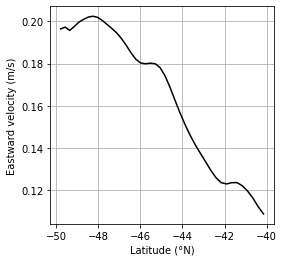

In [ ]:
# Save the result (keeping it in xarray format, not NumPy, to keep the latitude coordinate)
lat_velocities = data['U'].sel(time=datetime(2012,1,30,20),depth=2.1,
                               lat=slice(-50,-40),lon=slice(0,120)).mean(dim='lon')

# So this gave the eastward velocity averaged over all longitudes in the swath,
# so it's a 1-D array (a line) over latitude
plt.figure(figsize=(4,4))
plt.plot(lat_velocities['lat'],lat_velocities.values,c='k')
plt.xlabel('Latitude (°N)')
plt.ylabel('Eastward velocity (m/s)')
plt.grid()